In [ ]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Wine_clust .csv')

In [ ]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


checking if there is null values

In [ ]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
df[df.duplicated(keep='first')]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [ ]:
X=df.iloc[:,[0,1]]
X.head()

,Alcohol,Malic_Acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


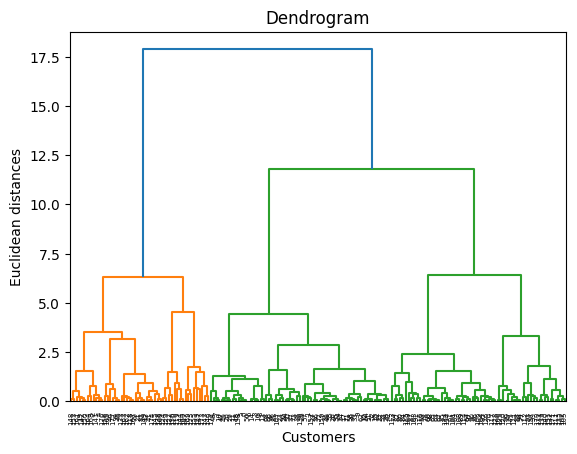

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

<Axes: xlabel='Alcohol', ylabel='Malic_Acid'>

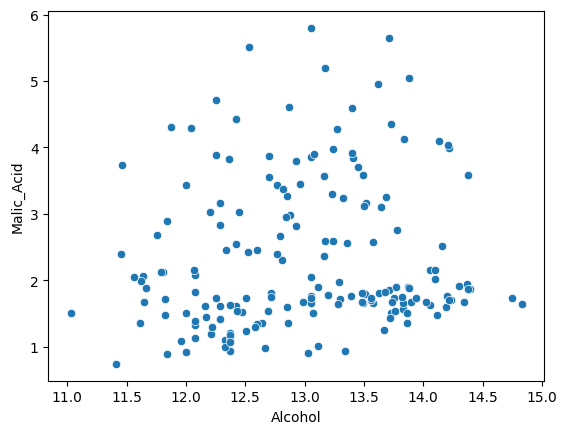

In [ ]:
sns.scatterplot(x='Alcohol',y='Malic_Acid',data=df)

choosing no. of cluskers k=3

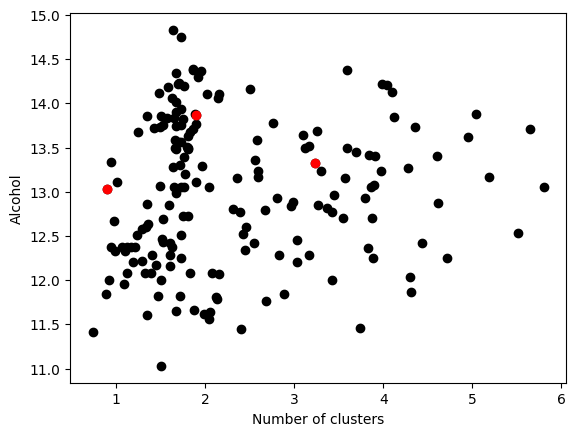

In [ ]:
X=df

#number of cluster
K =3

Centroids=(X.sample(n=K))
plt.scatter(X["Malic_Acid"],X["Alcohol"],c='black')
plt.scatter(Centroids["Malic_Acid"],Centroids["Alcohol"],c='red')
plt.xlabel('Number of clusters')
plt.ylabel('Alcohol')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
K=3
# Fit a K means model
kmeans=KMeans(n_clusters=K,random_state=0)
X["Cluster"]=kmeans.fit_predict(X[["Malic_Acid","Alcohol"]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


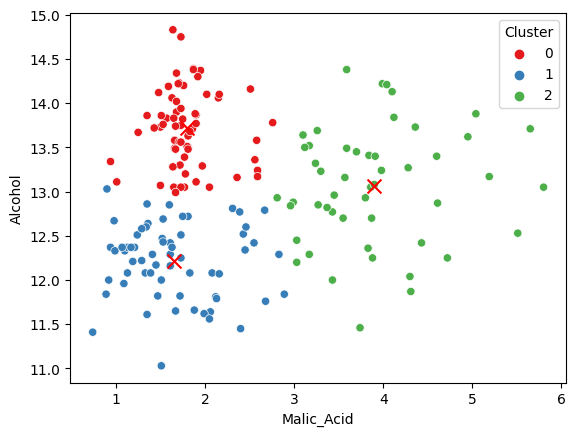

In [ ]:
#Get cluster centroids
centroids=kmeans.cluster_centers_

#plot the data points & centroids
sns.scatterplot(data=X,x="Malic_Acid",y="Alcohol",hue="Cluster",palette="Set1")
plt.scatter(centroids[:,0],centroids[:,1],c='red',marker='x',s=100)
plt.xlabel('Malic_Acid')
plt.ylabel('Alcohol')
plt.show()

In [ ]:
#get the innertia (witin cluster sum of squares)
inertia =kmeans.inertia_

#print the inertia
print("Inertia:",inertia)

Inertia: 95.55394205616608


Optimal k value : Elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

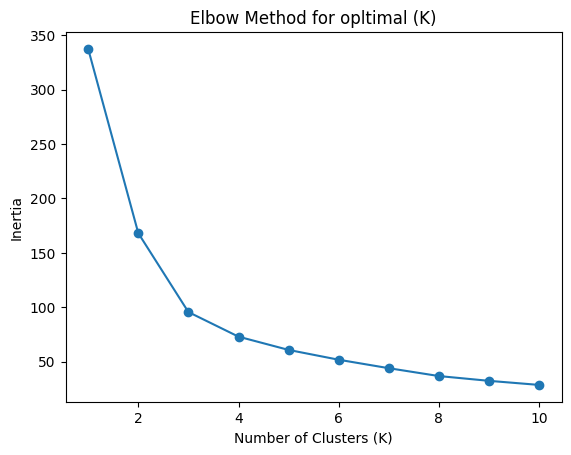

In [ ]:
# Define a range of k values to teest
import matplotlib.pyplot as plt

K_range=range(1,11)  #(start,stop+1)
inertia_values=[]

#calculate the inertia for different values of k
for K in K_range:
  kmeans=KMeans(n_clusters=K,random_state=0)
  kmeans.fit(X[["Malic_Acid","Alcohol"]])
  inertia=kmeans.inertia_
  inertia_values.append(inertia)

  #plot the inertia values
plt.plot(K_range,inertia_values,marker='o')
plt.title('Elbow Method for opltimal (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()



Evaluating algorithm

In [ ]:
# Evaluate the clustering using silhouette score,Dun score
from sklearn.metrics import silhouette_score

silhouette_avg =silhouette_score(X[["Malic_Acid","Alcohol"]],X["Cluster"])
print("Silhoutte Score:",silhouette_avg)


Silhoutte Score: 0.4805357240626069


DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
dbscan=DBSCAN(eps=1,min_samples=4)

In [ ]:
labels=dbscan.fit_predict(df)

In [ ]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
df_norm=StandardScaler().fit_transform(df)
df_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  1.01300893,
        -1.14558868,  0.        ],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.96524152,
        -1.14558868,  0.        ],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  1.39514818,
        -1.14558868,  0.        ],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ...,  0.28057537,
         1.35643322,  0.        ],
       [ 0.20923168,  0.22769377,  0.01273209, ...,  0.29649784,
        -1.14558868,  0.        ],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -0.59516041,
         1.35643322,  0.        ]])

In [ ]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(df_norm)

DBSCAN(eps=1, min_samples=4)

In [ ]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
# Adding clusters to dataset
df['clusters']=dbscan.labels_
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster,clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,-1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,-1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,-1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,-1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2,-1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2,-1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2,-1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,-1


In [ ]:
df.groupby('clusters').agg(['mean']).reset_index()

,clusters,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.02927,0.361854,1.590899,5.05809,0.957449,2.611685,746.893258,0.91573


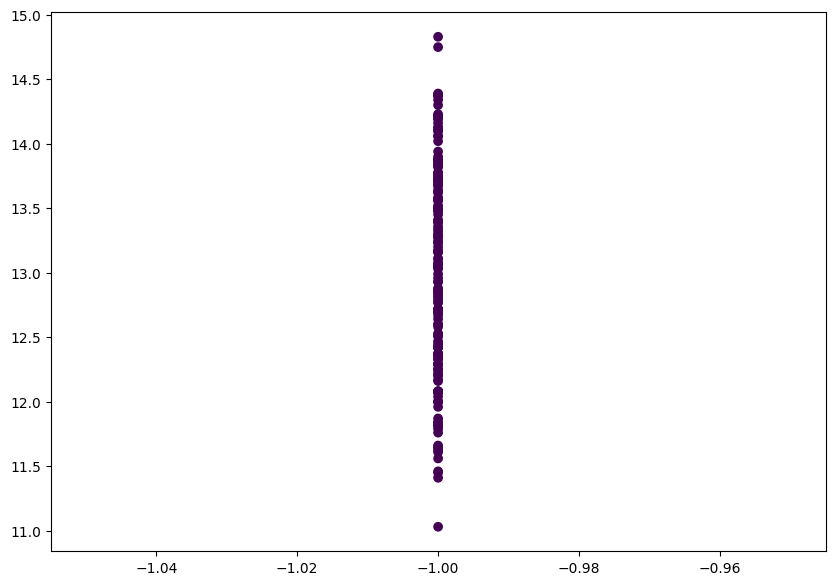

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))
plt.scatter(df['clusters'],df['Alcohol'], c=dbscan.labels_)

In [ ]:
np.unique(labels)

array([-1])